# Gliders in the Rockall Trough: the 2021 onset of the spring bloom in the eastern subpolar North Atlantic

Name:

Collaborators:


# Data sources (must be cited in your paper!)

+ Sea surface color (climatologies and near-real time) from satellites is from the [MODIS sensor on NASA's Aqua satellite](https://modis.gsfc.nasa.gov/data/dataprod/chlor_a.php) most easily accessed by [this interactive viewer](https://oceancolor.gsfc.nasa.gov/l3/).  The formal citation for the MODIS sea surface color data is:

Hu, C., Lee Z., and Franz, B.A. (2012). Chlorophyll-a algorithms for oligotrophic oceans:A novel approach based on three-band reflectance difference, J. Geophys. Res., 117, C01011, doi:10.1029/2011JC007395.

+ Near real time glider data are from:

Dumont, E., Cunningham, S. A., and Inall, M. (2021). Seaglider data from the Ellett Array/CLASS/OSNAP projects. Accessed via: http://vocal.sams.ac.uk/dashboard.php, May 2021.

+ Climatological glider data are from:

Gary, S. F., Cunningham, S. A., Johnson, C., Houpert, L., Holliday, N. P., Behrens, E., Biastoch, A., & Böning, C. W. (2018). Seasonal cycles of oceanic transports in the eastern subpolar North Atlantic. Journal of Geophysical Research: Oceans, 123(2), 1471-1484, doi:10.1002/2017JC013350.

+ Climatological light input data were obtained from the [NASA Langley Research Center Atmospheric Science Data Center](https://asdc.larc.nasa.gov/project/SRB/SRB_REL3.0_LPSA_MONTHLY_NC_1):

Kato, Seiji (2007) A Long-Term TOA and Constrained Surface Radiation Budget Dataset Using Merged CERES, ERBE and ISCCP/SRB Products from the Past 30 Years, https://earthdata.nasa.gov/esds/competitive-programs/measures/long-term-toa-and-constrained-surface-radiation-budget-dataset, doi:10.5067/SRB/REL3.0_LPSA_MONTHLY_NC_L3, downloaded Nov. 22, 2020.

# Load supporting libraries and define MLD function

In [1]:
import load_glider_data as sg
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

#=================================
# Function to find the mixed layer
# depth (MLD) based on the depth
# of first occurance of a density
# difference greater than s0_thresh
# (the threshold density difference, 
# 0.02 kg/m^3 for this analysis).
def find_mld(de,s0,s0_thresh):
    # Find the difference with the surface
    # density. Since bubbles at the surface
    # can cause bad density values at the
    # very top of the water column, find the
    # minimum density of the profile after
    # ignoring all the NaN (not a number)
    # placeholders for missing/bad data.
    ds0 = s0-s0[~np.isnan(s0)].min()
    
    # Find all the values that are right at
    # and below the MLD.  Select the single
    # value at the MLD by taking the minimum
    # depth and density.
    de_mld = de[ds0 > s0_thresh].min()
    s0_mld = s0[ds0 > s0_thresh].min()
    
    return de_mld, s0_mld
    

# Results

## Step 0: Maps of the seasonal chlorophyll patterns for this region -> FIGURE 1

Please follow the instructions in the pre-lab page of Blackboard to download maps for seasonally high and low chlorophyll in the region around the Rockall Trough.

## Step 1: Climatological profiles -> FIGURE 2 (April 29)

+ Load the climatological (time-mean) profiles from 10.1W, 57.1N from Gary et al. (2018).  These profiles have exactly the same format as the glider data we plotted in previous assignments although they are really a blend of ship, glider, and other robot observations - basically all data available in the region!  They represent the best estimate of long-term average conditions for each season.  To access them, use glider number `'000'` and request profiles `['DJF', 'MAM', 'JJA', and 'SON']`, where seasonal averages are given acronyms by first letter of each month.

+ The goal for Figure 2 is to plot **density profiles** in two subplots: one with individual glider dives and the other with seasonal climatological profiles. Both subplots will use the `find_mld` function above, also plot the mixed layer depth.  The resulting figure should look a lot like Segar's [Chapter 8](https://reefimages.com/oceans/SegarOcean4Chap08.pdf)'s Figure 8-20, but all profiles are overlaid on top of each other.

+ In the left subplot (seaglider profiles), plot at least one representative profile from sg605 (fall-winter) and one profile from sg532 (winter-spring). An example is provided. There is no "correct" answer - explore the data through trial and error! All the profiles available are from dives within the deep water of the Rockall Trough (from 11W to 9W and 56.5N to 57.5N); there are 398 dives for sg605 and more than 200 dives for sg532.

+ In the right subplot, plot the climatological profiles.  

+ In both subplots, label both axes and include a legend so we know which line corresponds to which season.

+ You are welcome to reuse code from previous assignments.

+ If you would like a more involved challenge, **monthly** climatological data are also available, e.g. `['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']`.  You have the **option** of plotting *monthly* profiles (as presented in the lab into slides) instead of the *seasonal* profiles.  If you choose monthly data, due to the larger number of profiles, I would recommend applying an offset to each profile to create a waterfall plot rather than a pure overlay. 

Text(0.5, 1.0, 'Climatological profiles')

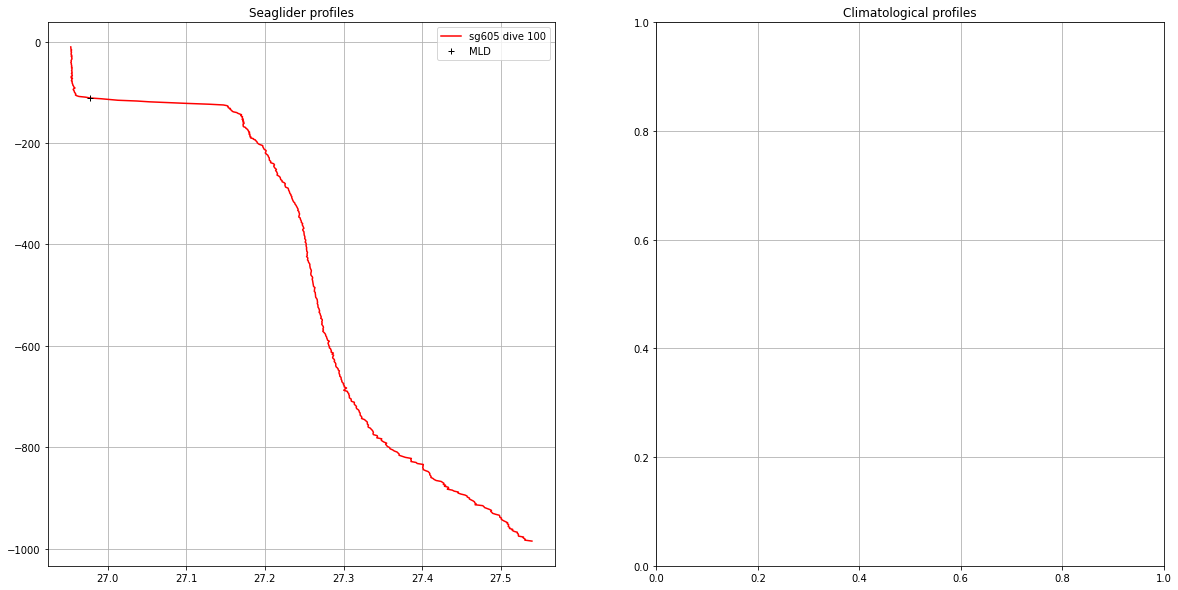

In [2]:
# Plot seasonal climatology density profiles

fig, axs = plt.subplots(1,2,figsize=(20,10))

#========Left Subplot==========
[lon, lat, de, te, sa, th, s0, year, month, day] = sg.load_hb_profile('605','0100')
axs[0].plot(s0,-1.0*de,'r-')

de_mld, s0_mld = find_mld(de,s0,0.02)
axs[0].plot(s0_mld,-1.0*de_mld,'k+')

axs[0].grid()
axs[0].legend(['sg605 dive 100','MLD'])
axs[0].set_title('Seaglider profiles')

#========Right Subplot==========

axs[1].grid()
axs[1].set_title('Climatological profiles')

**Figure 2:** You can enter your caption here as your make the figure.  Then you can cut and paste it into your final report document later. 

# Step 2: Climatological time series -> start FIGURE 3  (April 29)

Below, the light, chlorophyll, and MLD climatologies are loaded.  The specifics are:

+ Light is incoming shortwave radiation (i.e. sunlight) at 57N, 10W from Kato (2007), units of Watts per meter squared (W/m^2)
+ Chlorophyll is the concentration of chlorophyll pigment in the surface water at 57N, 10W from Hu et al. (2012) and data updates, units of milligrams of chlorophyll per cubic meter of seawater (mg/m^3).  Because the chlorophyll numerical values are much smaller than MLD and light, you'll want to multiply all the chlorophyll values by a constant number to scale up the curve.  Include  that scale factor in the axis label and caption.
+ Mixed layer depth (MLD), in units of meters (m), is the depth at which the difference between the surface water and deep water is greater than 0.02 kg/m3 at 57N, 10W.

Plot each climatology *on the same figure* so that each climatology can be compared to the others.  Please include axis labels and a legend.


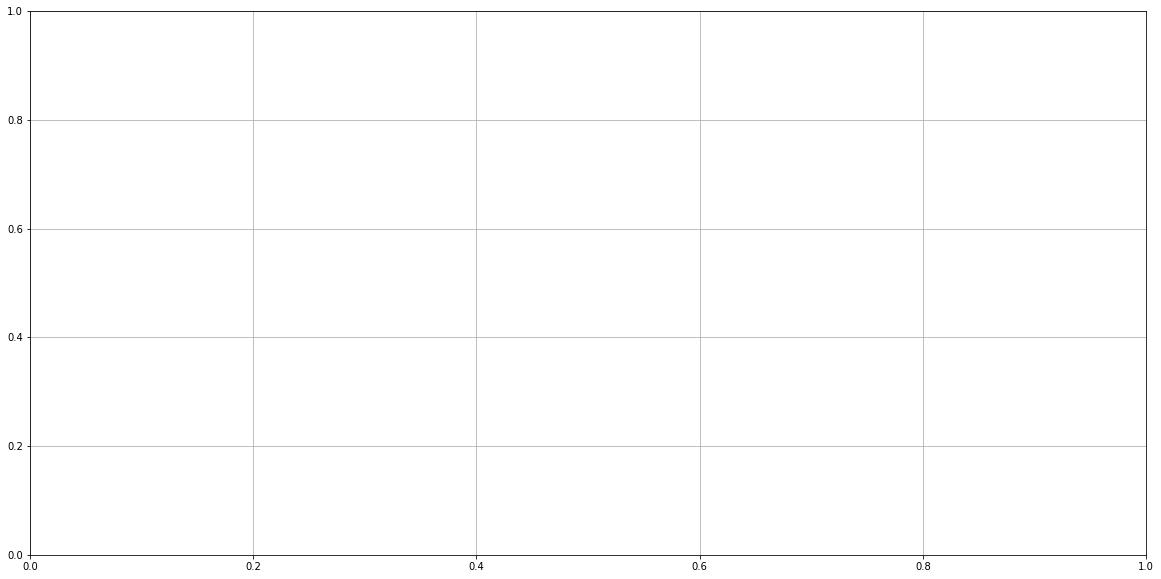

In [3]:
fig, ax = plt.subplots(figsize=(20,10))

# Light climatology
light = np.loadtxt('light_clim.csv',delimiter=',')
ymd = light[:,0:3].astype(int)
light_clim_dates = [dt.datetime(*dd) for dd in ymd]
light_clim_data = light[:,3]

# CHL climatology
chl_clim = np.loadtxt('chl_clim.txt',delimiter=',')
ymd = chl_clim[:,0:3].astype(int)
chl_clim_data = chl_clim[:,3]
chl_clim_dates = [dt.datetime(*dd) for dd in ymd]

# MLD climatology
mld_clim = np.loadtxt('mld_clim.txt',delimiter=',')
ymd = mld_clim[:,0:3].astype(int)
mld_clim_data = mld_clim[:,3]
mld_clim_dates = [dt.datetime(*dd) for dd in ymd]

ax.grid()

**Figure 3:** Caption goes here and also into your paper.

# Step 3: Near Real Time data -> finish Figure 3 (May 6)

The final step is to overlay the near real time (NRT) data on top of the climatology.  The NRT MLD time series is from all the glider dives in a 2 degree x 1 degree box centered around 10W, 57N.  (The box spans 11W to 9W and 56.5N to 57.5N.)  Near-real time chlorophyll are available in an 8-day (8D) interval time series and a 3-day (R3QL = "rolling 3-day quick look") interval time series.  The R3QL is the most up to date time series while the 8D data has been more carefully calibrated and extends further back in time.  On top of the existing climatology,

+ plot the NRT MLD time series,
+ plot the 8D chlorophyll time series, 
+ plot the R3QL chlorophyll time series, and
+ label axes and legends as needed.

*Optional suggestion:* To make reading the plot easier, experiment with line types, e.g. `ko-`. Also example, setting `linewidth=4` in the plot command will create very thick lines - doing this for the climatologies may make it easier to interpret the NRT data with resptect to the longer-term mean values.

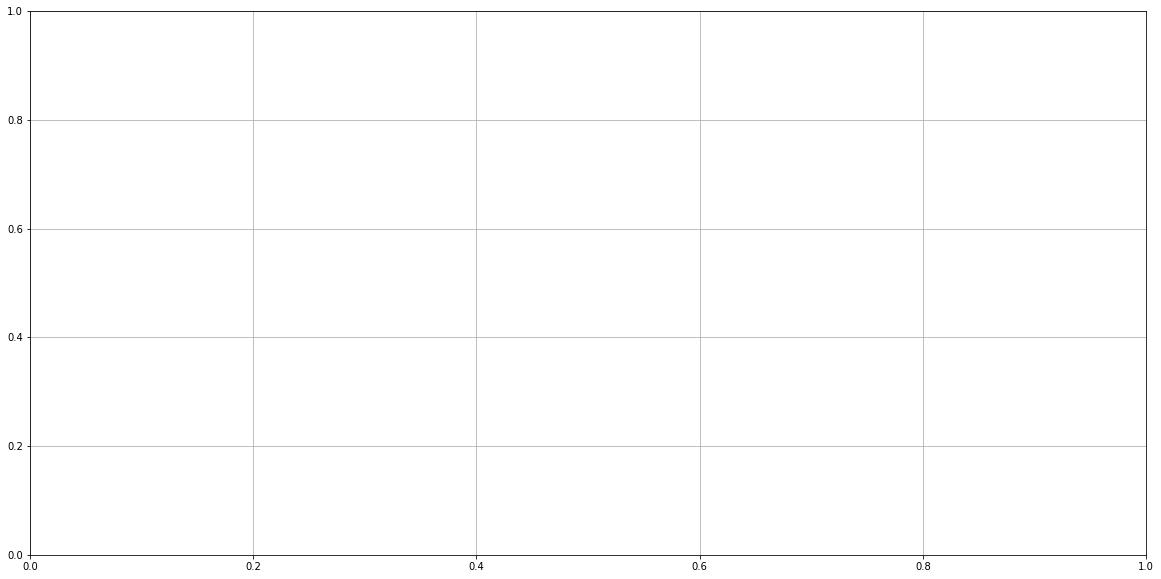

In [4]:
#===================================================
# Get time series for MLD for sg605 (398 dives) and sg532 (209+ dives)

# Initialize the storage
ymdds = []

# sg605
dive_num = 398
list_dives = np.linspace(1,dive_num,dive_num)

for dive in list_dives:
    [lon, lat, de, te, sa, th, s0, year, month, day] = sg.load_hb_profile('605',str(int(dive)).zfill(4))
    de_mld, s0_mld = find_mld(de,s0,0.02)
    
    ymdds.append([year, month, day, de_mld, s0_mld])
    
# sg532
dive_num = 209  # <-------------------------------UPDATE AS NEW DATA IS AVAILABLE!
list_dives = np.linspace(1,dive_num,dive_num)

for dive in list_dives:
    [lon, lat, de, te, sa, th, s0, year, month, day] = sg.load_hb_profile('532',str(int(dive)).zfill(4))
    de_mld, s0_mld = find_mld(de,s0,0.02)
    
    ymdds.append([year, month, day, de_mld, s0_mld])
    
# Convert to numpy array:
ymdds_np = np.asarray(ymdds)
ymd = ymdds_np[:,0:3].astype(int)

# Convert to datetimes
mld_dates = [dt.datetime(*dd) for dd in ymd]
mld_data = ymdds_np[:,3]
#=====================================================

fig, ax = plt.subplots(figsize=(20,10))

# Light climatology loaded above

# CHL climatology loaded above

# MLD climatology loaded above

# MLD 2020-2021

# CHL R3QL
chl_r3ql, chl_r3ql_dates = sg.load_chl(-10,57,'R3QL')

# CHL 8D
chl_8d, chl_8d_dates = sg.load_chl(-10,57,'8D')

ax.grid()
